<a href="https://colab.research.google.com/github/add54/-Data-Analysis-plotly-Plotly-Whirlwind-Introduction.ipynb-/blob/master/Loan_ML_Advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import os
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling

pd.set_option('display.max_rows', None,'display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, cross_validate
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, make_scorer

from scipy.stats import ks_2samp
#rom treeinterpreter import treeinterpreter as ti

#from sklearn.preprocessing import Imputer, StandardScaler
#from sklearn import cross_validation
from sklearn import metrics

"""
from sklearn import metrics
from sklearn import linear_model

from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import preprocessing
"""
pd.set_option('max_columns', 100)
pd.set_option('max_colwidth', 5000)
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,12)
#df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/loan_data.csv",encoding='latin-1')
#df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/accepted_2007_to_2018Q4.csv.gz",compression='gzip',low_memory=True)
import warnings
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/loans_2007.csv')


# skip row 1 so pandas can parse the data properly.
loans_2007 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lending_club_loans.csv', skiprows=1, low_memory=False) 
half_count = len(loans_2007) / 2
loans_2007 = loans_2007.dropna(thresh=half_count,axis=1) # Drop any column with more than 50% missing values
loans_2007 = loans_2007.drop(['url','desc'],axis=1)      # Don't need these columns.

#warnings.filterwarnings("ignore", category=DeprecationWarning) 
#warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None)
#df = pd.read_csv('../input/accepted_2007_to_2017Q3.csv.gz',compression='gzip',low_memory=True)

#pd.set_option('display.max_columns', None) # Display any number of columns


In [ ]:
print(loans_2007.shape)
loans_2007.head()

(42538, 56)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,Sep-2016,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2016,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,Sep-2016,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,604.0,600.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,695.0,699.0,0.0,15.0,0.0,27783.0,53.9%,38.0,f,270.78,270.78,3784.490000,3784.49,2729.22,1055.27,0.00,0.00,0.00,Sep-2016,67.79,Sep-2016,694.0,690.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Data Dictionary from Lending Club 
data_dictionary = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LCDataDictionary.csv')
print(data_dictionary.shape[0])
data_dictionary.columns.tolist()

117


['LoanStatNew', 'Description']

In [ ]:
loans_2007.columns
loans_2007.shape

(42538, 56)

In [ ]:
data_dictionary.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.


In [ ]:
#Join the first row of loans_2007 and data_dictionary:
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'name'})

loans_2007_dtypes = pd.DataFrame(loans_2007.dtypes,columns=['dtypes'])
loans_2007_dtypes = loans_2007_dtypes.reset_index()
loans_2007_dtypes['name'] = loans_2007_dtypes['index']
loans_2007_dtypes = loans_2007_dtypes[['name','dtypes']]

# the column, first_value, contains values of first row in loans_2007
loans_2007_dtypes['first value'] = loans_2007.loc[0].values
preview = loans_2007_dtypes.merge(data_dictionary, on='name',how='left')

In [ ]:
preview.head()

,name,dtypes,first value,Description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1.2966e+06,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,5000,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,4975,The total amount committed by investors for that loan at that point in time.


In [ ]:
#FIRST GROUP OF COLUMNS:
preview[:25]

,name,dtypes,first value,Description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1.2966e+06,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,5000,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,4975,The total amount committed by investors for that loan at that point in time.
5,term,object,36 months,The number of payments on the loan. Values are in months and can be either 36 or 60.
6,int_rate,object,10.65%,Interest Rate on the loan
7,installment,float64,162.87,The monthly payment owed by the borrower if the loan originates.
8,grade,object,B,LC assigned loan grade
9,sub_grade,object,B2,LC assigned loan subgrade


In [ ]:
loans_2007.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax

In [ ]:
drop_list = ['id','member_id','funded_amnt','funded_amnt_inv','grade','sub_grade','emp_title','issue_d']
loans_2007 = loans_2007.drop(drop_list,axis=1)
loans_2007.head(2)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-2015,171.62,Sep-2016,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,Sep-2016,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [ ]:
#SECOND GROUP OF COLUMNS:
preview[25:50]

,name,dtypes,first value,Description
25,fico_range_low,float64,735,The lower boundary range the borrower’s FICO at loan origination belongs to.
26,fico_range_high,float64,739,The upper boundary range the borrower’s FICO at loan origination belongs to.
27,inq_last_6mths,float64,1,The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
28,open_acc,float64,3,The number of open credit lines in the borrower's credit file.
29,pub_rec,float64,0,Number of derogatory public records
30,revol_bal,float64,13648,Total credit revolving balance
31,revol_util,object,83.7%,"Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."
32,total_acc,float64,9,The total number of credit lines currently in the borrower's credit file
33,initial_list_status,object,f,"The initial listing status of the loan. Possible values are – W, F"
34,out_prncp,float64,0,Remaining outstanding principal for total amount funded


In [ ]:
#DATA CLEANING COLUMNS NOT NEED IT 
drop_cols = ['out_prncp','out_prncp_inv',
             'total_pymnt','total_pymnt_inv',
             'total_rec_prncp', 'fico_range_low',
             'total_rec_int','total_rec_late_fee',
             'recoveries','collection_recovery_fee',
             'last_pymnt_d','last_pymnt_amnt', 'last_fico_range_low']
loans_2007 = loans_2007.drop(drop_cols, axis=1)
loans_2007.head(2)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,last_fico_range_high,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,Sep-2016,744.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,Sep-2016,499.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [ ]:
{column: len(loans_2007[column].unique()) for column in loans_2007.columns}

{'acc_now_delinq': 3,
 'addr_state': 51,
 'annual_inc': 5598,
 'application_type': 2,
 'chargeoff_within_12_mths': 2,
 'collections_12_mths_ex_med': 2,
 'delinq_2yrs': 13,
 'delinq_amnt': 4,
 'dti': 2895,
 'earliest_cr_line': 531,
 'emp_length': 12,
 'fico_range_high': 45,
 'home_ownership': 6,
 'initial_list_status': 2,
 'inq_last_6mths': 29,
 'installment': 16460,
 'int_rate': 395,
 'last_credit_pull_d': 112,
 'last_fico_range_high': 73,
 'loan_amnt': 899,
 'loan_status': 10,
 'open_acc': 45,
 'policy_code': 2,
 'pub_rec': 7,
 'pub_rec_bankruptcies': 4,
 'purpose': 15,
 'pymnt_plan': 3,
 'revol_bal': 22710,
 'revol_util': 1120,
 'tax_liens': 3,
 'term': 3,
 'title': 21265,
 'total_acc': 84,
 'verification_status': 4,
 'zip_code': 838}

In [ ]:
#THIRD GROUP OF COLUMNS:
preview[50:]

,name,dtypes,first value,Description
50,application_type,object,INDIVIDUAL,Indicates whether the loan is an individual application or a joint application with two co-borrowers
51,acc_now_delinq,float64,0,The number of accounts on which the borrower is now delinquent.
52,chargeoff_within_12_mths,float64,0,Number of charge-offs within 12 months
53,delinq_amnt,float64,0,The past-due amount owed for the accounts on which the borrower is now delinquent.
54,pub_rec_bankruptcies,float64,0,Number of public record bankruptcies
55,tax_liens,float64,0,Number of tax liens


In [ ]:
loans_2007.shape[1]

35

In [ ]:
loans_2007.loan_status.value_counts()


Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

In [ ]:
#CLASSIFICATION:
mapping_dict = {'loan_status':{'Fully Paid':1,'Charged Off': 0,'Late (31-120 days)': 0,'Default': 0}}
loans_2007 = loans_2007.replace(mapping_dict)
loans_2007 = loans_2007[(loans_2007['loan_status'] == 1) | (loans_2007['loan_status'] == 0)]

loans_2007.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,last_fico_range_high,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,1,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,Sep-2016,744.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,0,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,Sep-2016,499.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,1,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,739.0,2.0,2.0,0.0,2956.0,98.5%,10.0,f,Sep-2016,719.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,1,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,694.0,1.0,10.0,0.0,5598.0,21%,37.0,f,Apr-2016,604.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
5,5000.0,36 months,7.90%,156.46,3 years,RENT,36000.0,Source Verified,1,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,734.0,3.0,9.0,0.0,7963.0,28.3%,12.0,f,Jan-2016,679.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Removing singles values Columns:
loans_2007.isna().sum()


loan_amnt                        0
term                             0
int_rate                         0
installment                      0
emp_length                    1057
home_ownership                   0
annual_inc                       0
verification_status              0
loan_status                      0
pymnt_plan                       0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
fico_range_high                  0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                      50
total_acc                        0
initial_list_status              0
last_credit_pull_d               2
last_fico_range_high             0
collections_12_mths_ex_med      56
policy_code         

In [ ]:
drop_columns = []

for col in loans_2007.columns:
    non_null = loans_2007[col].dropna()
    unique_non_null = non_null.unique()
    num_true_unique = len(unique_non_null)
    if num_true_unique < 2:
        drop_columns.append(col)
        
loans_2007 = loans_2007.drop(drop_columns, axis=1)
drop_columns

['initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [ ]:
for col in loans_2007.columns:
    if (len(loans_2007[col].unique()) < 4):
        print(loans_2007[col].value_counts())
        print()

 36 months    29096
 60 months    10156
Name: term, dtype: int64

Not Verified       16846
Verified           12533
Source Verified     9873
Name: verification_status, dtype: int64

1    33586
0     5666
Name: loan_status, dtype: int64

n    39251
y        1
Name: pymnt_plan, dtype: int64



In [ ]:
#Notice that the pymnt_plan field has two unique values but the one value(y) has only 1 frequency and so it is safe to consider as a single value column.
print(loans_2007.shape[1])
loans_2007 = loans_2007.drop('pymnt_plan', axis=1)
loans_2007.shape[1]

27


26

In [ ]:
loans_2007.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
emp_length              1057
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
pymnt_plan                 0
purpose                    0
title                     11
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
fico_range_high            0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_credit_pull_d         2
last_fico_range_high       0
pub_rec_bankruptcies     697
dtype: int64

In [ ]:
loans_2007 = loans_2007.drop(['pub_rec_bankruptcies'], axis=1)

In [ ]:
print(loans_2007.dtypes)
loans_2007.head(2)

loan_amnt               float64
term                     object
int_rate                 object
installment             float64
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
loan_status              object
pymnt_plan               object
purpose                  object
title                    object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs             float64
earliest_cr_line         object
fico_range_high         float64
inq_last_6mths          float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util               object
total_acc               float64
last_credit_pull_d       object
last_fico_range_high    float64
dtype: object


,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,last_fico_range_high
0,5000.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,1,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,Sep-2016,744.0
1,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,0,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,Sep-2016,499.0


In [ ]:
def binary_encode(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df


<function __main__.ordinal_encode>

In [ ]:
#
#Notice these columns, 'int_rate' and 'revol_util' represent numeric values but are in text forms. They need to be converted into float:
for col in ['int_rate','revol_util']:
    loans_2007[col] = loans_2007[col].str.rstrip('%').astype('float')

In [ ]:
#Text columns 
object_columns_df = loans_2007.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

term                     36 months
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
loan_status                      1
pymnt_plan                       n
purpose                credit_card
title                     Computer
zip_code                     860xx
addr_state                      AZ
earliest_cr_line          Jan-1985
last_credit_pull_d        Sep-2016
Name: 0, dtype: object


In [ ]:
#CATEGORICAL COLUMNS 
cols = ['home_ownership','verification_status','emp_length','term','addr_state']

for col in cols:
    print(loans_2007[col].value_counts())
    print()

RENT        18721
MORTGAGE    17402
OWN          3028
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

Not Verified       16846
Verified           12533
Source Verified     9873
Name: verification_status, dtype: int64

10+ years    8723
< 1 year     4557
2 years      4351
3 years      4054
4 years      3395
5 years      3250
1 year       3216
6 years      2202
7 years      1742
8 years      1459
9 years      1246
Name: emp_length, dtype: int64

 36 months    29096
 60 months    10156
Name: term, dtype: int64

CA    7032
NY    3762
FL    2834
TX    2700
NJ    1831
IL    1514
PA    1499
VA    1389
GA    1381
MA    1323
OH    1203
MD    1041
AZ     867
WA     831
CO     778
NC     773
CT     738
MI     718
MO     678
MN     611
NV     489
SC     469
WI     448
AL     442
OR     442
LA     432
KY     319
OK     295
KS     265
UT     255
AR     242
DC     213
RI     197
NM     187
WV     174
HI     171
NH     169
DE     114
MT      84
WY      83
AK      80
SD      62


In [ ]:
for name in ['purpose', 'title']:
  print(loans_2007[name].value_counts())
  print()

Streaming output truncated to the last 5000 lines.
Consolidating Cards                                                                    1
Upside Down                                                                            1
Josh's Debt Gone                                                                       1
Dependable debt consolidation.                                                         1
Andy                                                                                   1
Trevor Debt Consolidation Loan                                                         1
combine all credit cards debt into one                                                 1
Help Me Slash My Debt.                                                                 1
1FBUSA Credit Card Refinance                                                           1
jet boatloan                                                                           1
Adjustment loan                                            

In [ ]:
mapping_dict = {
    'emp_length':{
        '10+ years': 10,
        '9 years': 9,
        '8 years': 8,
        '7 years': 7,
        '6 years': 6,
        '5 years': 5,
        '4 years': 4,
        '3 years': 3,
        '2 years': 2,
        '1 year': 1,
        '< 1 year': 0,
        'n/a': 0
    }
}

loans_2007 = loans_2007.drop(['last_credit_pull_d','addr_state','title','earliest_cr_line'], axis=1)
    
loans_2007 = loans_2007.replace(mapping_dict)
loans_2007.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,zip_code,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high
0,5000.0,36 months,10.65,162.87,10.0,RENT,24000.0,Verified,1,n,credit_card,860xx,27.65,0.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,744.0
1,2500.0,60 months,15.27,59.83,0.0,RENT,30000.0,Source Verified,0,n,car,309xx,1.00,0.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,499.0
2,2400.0,36 months,15.96,84.33,10.0,RENT,12252.0,Not Verified,1,n,small_business,606xx,8.72,0.0,739.0,2.0,2.0,0.0,2956.0,98.5,10.0,719.0
3,10000.0,36 months,13.49,339.31,10.0,RENT,49200.0,Source Verified,1,n,other,917xx,20.00,0.0,694.0,1.0,10.0,0.0,5598.0,21.0,37.0,604.0
5,5000.0,36 months,7.90,156.46,3.0,RENT,36000.0,Source Verified,1,n,wedding,852xx,11.20,0.0,734.0,3.0,9.0,0.0,7963.0,28.3,12.0,679.0


In [ ]:
#DUMMY VARIABLES

cat_columns = ['home_ownership','verification_status','purpose','term']
dummy_df = pd.get_dummies(loans_2007[cat_columns])
loans_2007 = pd.concat([loans_2007, dummy_df], axis=1)
loans_2007 = loans_2007.drop(cat_columns, axis=1)
loans_2007.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,pymnt_plan,zip_code,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,10.65,162.87,10.0,24000.0,1,n,860xx,27.65,0.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,744.0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2500.0,15.27,59.83,0.0,30000.0,0,n,309xx,1.00,0.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,499.0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2400.0,15.96,84.33,10.0,12252.0,1,n,606xx,8.72,0.0,739.0,2.0,2.0,0.0,2956.0,98.5,10.0,719.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,10000.0,13.49,339.31,10.0,49200.0,1,n,917xx,20.00,0.0,694.0,1.0,10.0,0.0,5598.0,21.0,37.0,604.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,5000.0,7.90,156.46,3.0,36000.0,1,n,852xx,11.20,0.0,734.0,3.0,9.0,0.0,7963.0,28.3,12.0,679.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
loans_2007['zip_code'].unique()

array(['860xx', '309xx', '606xx', '917xx', '852xx', '280xx', '900xx',
       '958xx', '774xx', '853xx', '913xx', '245xx', '951xx', '641xx',
       '921xx', '067xx', '890xx', '770xx', '335xx', '799xx', '605xx',
       '103xx', '150xx', '326xx', '564xx', '141xx', '080xx', '974xx',
       '934xx', '405xx', '946xx', '445xx', '850xx', '292xx', '088xx',
       '180xx', '029xx', '700xx', '010xx', '441xx', '104xx', '061xx',
       '616xx', '947xx', '914xx', '765xx', '980xx', '017xx', '972xx',
       '752xx', '787xx', '077xx', '540xx', '225xx', '440xx', '437xx',
       '559xx', '912xx', '325xx', '300xx', '923xx', '352xx', '013xx',
       '146xx', '074xx', '786xx', '937xx', '331xx', '115xx', '191xx',
       '114xx', '908xx', '902xx', '750xx', '950xx', '329xx', '226xx',
       '992xx', '614xx', '672xx', '083xx', '100xx', '926xx', '931xx',
       '712xx', '060xx', '707xx', '342xx', '604xx', '895xx', '430xx',
       '919xx', '996xx', '891xx', '935xx', '801xx', '928xx', '233xx',
       '927xx', '970

In [ ]:
loans_2007['zip_code'] = loans_2007['zip_code'].str.rstrip('x')
loans_2007['zip_code'].head()

0    860
1    309
2    606
3    917
5    852
Name: zip_code, dtype: object

In [ ]:
filtered_loans = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/loans_2007.csv',low_memory=False)
filtered_loans.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,zip_code,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,10.65,162.87,10,24000.0,1,860,27.65,0.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,744.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2500.0,15.27,59.83,0,30000.0,0,309,1.00,0.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,499.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2400.0,15.96,84.33,10,12252.0,1,606,8.72,0.0,739.0,2.0,2.0,0.0,2956.0,98.5,10.0,719.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,10000.0,13.49,339.31,10,49200.0,1,917,20.00,0.0,694.0,1.0,10.0,0.0,5598.0,21.0,37.0,604.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5000.0,7.90,156.46,3,36000.0,1,852,11.20,0.0,734.0,3.0,9.0,0.0,7963.0,28.3,12.0,679.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:

def zip_formatted(row):
    if len(str(row)) == 1:
        row = str(row)+ '00'
    elif len(str(row)) == 2:
        row = str(row)+ '0'
    return int(row)

In [ ]:
filtered_loans['zip_code'] = filtered_loans['zip_code'].apply(zip_formatted)

In [ ]:
filtered_loans['zip_code'].unique()

array([860, 309, 606, 917, 852, 280, 900, 958, 774, 853, 913, 245, 951,
       641, 921, 670, 890, 770, 335, 799, 605, 103, 150, 326, 564, 141,
       800, 974, 934, 405, 946, 445, 850, 292, 880, 180, 290, 700, 100,
       441, 104, 610, 616, 947, 914, 765, 980, 170, 972, 752, 787, 540,
       225, 440, 437, 559, 912, 325, 300, 923, 352, 130, 146, 740, 786,
       937, 331, 115, 191, 114, 908, 902, 750, 950, 329, 226, 992, 614,
       672, 830, 926, 931, 712, 600, 707, 342, 604, 895, 430, 919, 996,
       891, 935, 801, 928, 233, 927, 970, 211, 303, 194, 263, 403, 301,
       553, 993, 312, 432, 602, 216, 151, 971, 305, 334, 500, 129, 925,
       483, 760, 961, 200, 981, 330, 601, 117, 630, 920, 543, 775, 570,
       380, 221, 985, 113, 275, 236, 148, 450, 532, 729, 321, 959, 941,
       955, 217, 660, 620, 193, 857, 306, 271, 142, 956, 983, 945, 109,
       112, 802, 187, 435, 488, 287, 705, 592, 318, 549, 212, 347, 274,
       265, 785, 270, 813, 260, 201, 349, 322, 124, 940, 967, 11

In [ ]:
filtered_loans.isnull().sum()

loan_amnt                               0
int_rate                                0
installment                             0
emp_length                              0
annual_inc                              0
loan_status                             0
zip_code                                0
dti                                     0
delinq_2yrs                             0
fico_range_high                         0
inq_last_6mths                          0
open_acc                                0
pub_rec                                 0
revol_bal                               0
revol_util                             50
total_acc                               0
last_fico_range_high                    0
home_ownership_MORTGAGE                 0
home_ownership_NONE                     0
home_ownership_OTHER                    0
home_ownership_OWN                      0
home_ownership_RENT                     0
verification_status_Not Verified        0
verification_status_Source Verifie

In [ ]:

filtered_loans = filtered_loans.dropna()
print(filtered_loans.dtypes.value_counts())
print()
filtered_loans.isnull().sum()

float64    38
int64       3
dtype: int64



loan_amnt                              0
int_rate                               0
installment                            0
emp_length                             0
annual_inc                             0
loan_status                            0
zip_code                               0
dti                                    0
delinq_2yrs                            0
fico_range_high                        0
inq_last_6mths                         0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
last_fico_range_high                   0
home_ownership_MORTGAGE                0
home_ownership_NONE                    0
home_ownership_OTHER                   0
home_ownership_OWN                     0
home_ownership_RENT                    0
verification_status_Not Verified       0
verification_status_Source Verified    0
verification_sta

#MAKING PREDICTIONS

In [ ]:
loans = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/loans_2007.csv',low_memory=False)
loans.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,zip_code,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,10.65,162.87,10,24000.0,1,860,27.65,0.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,744.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2500.0,15.27,59.83,0,30000.0,0,309,1.00,0.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,499.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2400.0,15.96,84.33,10,12252.0,1,606,8.72,0.0,739.0,2.0,2.0,0.0,2956.0,98.5,10.0,719.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,10000.0,13.49,339.31,10,49200.0,1,917,20.00,0.0,694.0,1.0,10.0,0.0,5598.0,21.0,37.0,604.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5000.0,7.90,156.46,3,36000.0,1,852,11.20,0.0,734.0,3.0,9.0,0.0,7963.0,28.3,12.0,679.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
loans['zip_code'].unique()

array([860, 309, 606, 917, 852, 280, 900, 958, 774, 853, 913, 245, 951,
       641, 921,  67, 890, 770, 335, 799, 605, 103, 150, 326, 564, 141,
        80, 974, 934, 405, 946, 445, 850, 292,  88, 180,  29, 700,  10,
       441, 104,  61, 616, 947, 914, 765, 980,  17, 972, 752, 787,  77,
       540, 225, 440, 437, 559, 912, 325, 300, 923, 352,  13, 146,  74,
       786, 937, 331, 115, 191, 114, 908, 902, 750, 950, 329, 226, 992,
       614, 672,  83, 100, 926, 931, 712,  60, 707, 342, 604, 895, 430,
       919, 996, 891, 935, 801, 928, 233, 927, 970, 211, 303,  70, 194,
       263, 403, 301, 553, 993, 312, 432, 602, 216, 151, 971, 305, 334,
        50, 129, 925, 483, 760, 961, 200,  85, 981, 330, 601, 117,  63,
       920, 543, 775, 570,  38, 221, 985, 113, 275, 236, 148,  28, 450,
       532, 729, 321, 959, 941, 955, 217, 880, 660,  62, 193, 857, 306,
       271, 142, 956, 983, 945, 109, 112, 802, 187, 630, 435, 488, 287,
       705, 592, 318, 549, 212, 347, 274, 265, 785,  27,  89, 81

In [ ]:
#Let's make sure the loans DataFrame contains the right data types(numerics), 
#and also has no null value before applying machine learning algorithms:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39252 entries, 0 to 39251
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            39252 non-null  float64
 1   int_rate                             39252 non-null  float64
 2   installment                          39252 non-null  float64
 3   emp_length                           39252 non-null  int64  
 4   annual_inc                           39252 non-null  float64
 5   loan_status                          39252 non-null  int64  
 6   zip_code                             39252 non-null  int64  
 7   dti                                  39252 non-null  float64
 8   delinq_2yrs                          39252 non-null  float64
 9   fico_range_high                      39252 non-null  float64
 10  inq_last_6mths                       39252 non-null  float64
 11  open_acc                    

In [ ]:
#Let's also observe the frequency distribution of the unique values in the target column to help decide on the choice of error metric
loans['loan_status'].value_counts() / loans.shape[0]
#The value_counts shows a significant class imbalance in the target column - more than 85% of the loans were paid on time

1    0.855651
0    0.144349
Name: loan_status, dtype: float64

Picking An Error Metric And Handling The Class Imbalance

Since the main goal here is to construct a machine learning model that achieves a TPR greater than 50% while maintaining a FPR less than 7% ,it would be a terrible mistake to use just accuracy to measure model performance especially given such a high positive rate in the target column. Therefore, I'll not use accuracy istead use metrics that tell us the number of false positives and false negatives

In [ ]:
def compute_metrics(predictions):
    
    predictions = pd.Series(predictions)
    # False positives
    fp_filter = (predictions == 1) & (loans['loan_status'] == 0)
    fp = len(predictions[fp_filter])
    
    # True positives
    tp_filter = (predictions == 1) & (loans['loan_status'] == 1)
    tp = len(predictions[tp_filter])
    
    # False negatives
    fn_filter = (predictions == 0) & (loans['loan_status'] == 1)
    fn = len(predictions[fn_filter])
    
    # True negatives
    tn_filter = (predictions == 0)& (loans['loan_status'] == 0)
    tn = len(predictions[tn_filter])
    
    # Rates
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    
    print(tpr * 100)
    print(fpr * 100)
    print()
    
    print('Other Mesurements:')
    
    
    sp = tn / (tn + fp)
    sty = tp / (tp + fn)
    G_mean = np.sqrt(sp * sty)
    prcn = tp / (tp + fp)
    acc = (tn + tp) / features.shape[0]
    method_dict = {'specificity': '{:.2f}'.format(sp*100), 
               'sensitivity': '{:.2f}'.format(sty*100), 
               'G-mean': '{:.2f}'.format(G_mean*100),
               'precision': '{:.2f}'.format(prcn*100), 
               'accuracy': '{:.2f}'.format(acc*100),
               'False Positive Rate': '{:.2f}'.format(fpr*100)
              }
    return pd.DataFrame(method_dict,index=['values'])


#Predictions without these columns:¶
1. last_fico_range_high
2. zip_code

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
#from sklearn.cross_validation import cross_val_predict, KFold
scaler = StandardScaler()

In [ ]:
loans = loans.dropna()
x_cols = loans.columns
features_cols = x_cols.drop(['loan_status','last_fico_range_high','zip_code']) # Dropping last_fico_range_high field
features = loans[features_cols]
target = loans['loan_status']

In [ ]:
print(np.all(np.isinf(loans)))
np.any(np.isinf(loans))

False


False

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


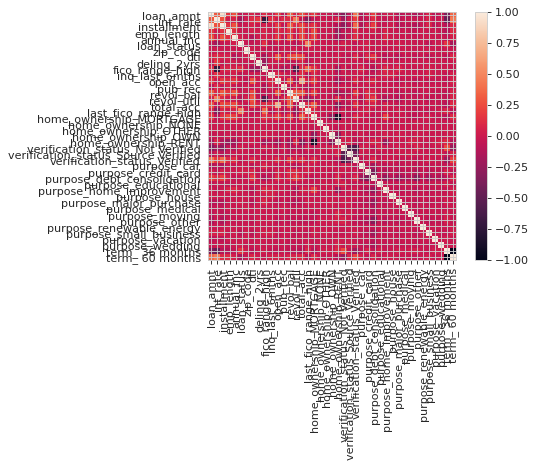

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(loans, graphWidth):
    filename = loans.dataframeName
    loans = loans.dropna('columns') # drop columns with NaN
    loans = loans[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if loans.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({loans.shape[1]}) is less than 2')
        return
corr = loans.corr()
plt.figure(num=None, dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
#plt.title(f'Correlation Matrix for {filename}', fontsize=15)
plt.tight_layout()
plt.show()

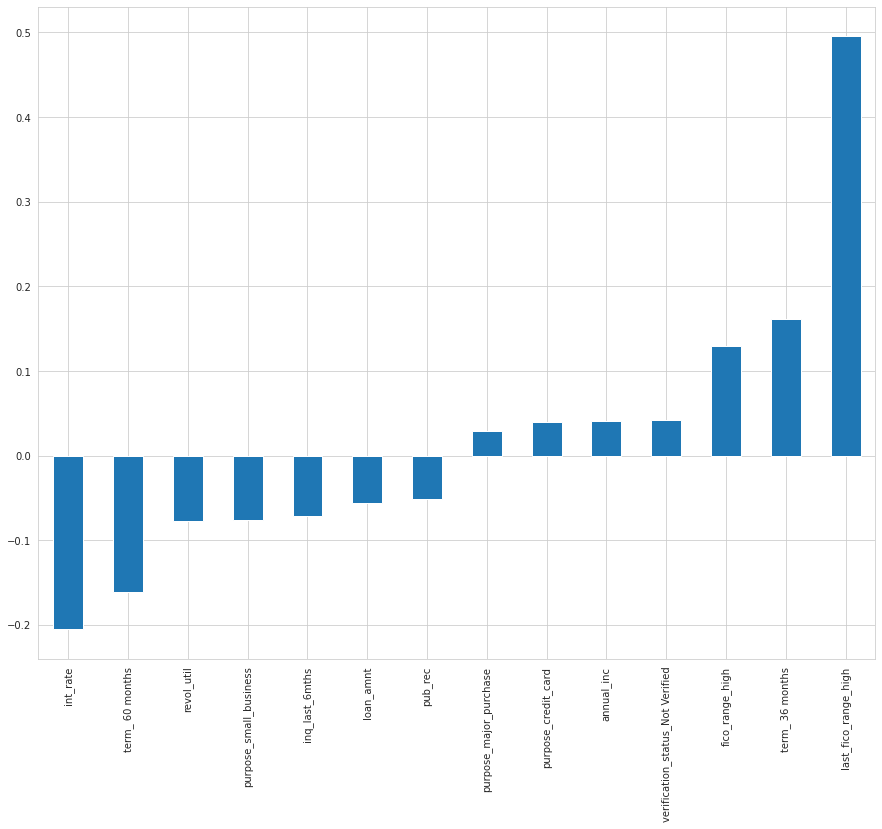

In [ ]:
corrs = loans.corr()['loan_status'].sort_values(ascending=True).drop('loan_status')
pd.concat([corrs.iloc[:7],corrs.iloc[-7:]],axis=0).plot.bar()

#
Logistic Regression:

In [ ]:
#np.any(np.isinf(loans))
lr = LogisticRegression()
kf = KFold(features.shape[0],random_state=1)

predictions = cross_val_predict(lr,features,target,cv=kf) 

# Let's compute performance:
metrics = compute_metrics(predictions)
metrics

In [ ]:
X = loans.drop('loan_status', axis=1).values
y = loans['loan_status'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=101)

In [ ]:
#Scale the data in the range [0,1].
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix,precision_score,recall_score,precision_recall_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
sn.countplot(y='loan_status', data=loans)
loans = loans[(loans['loan_status'] == 'Fully Paid') | (loans['loan_status'] == 'Charged Off')]
loans['label'] = loans.apply(lambda r: 1 if r['loan_status'] == 'Fully Paid' else 0, axis=1)
loans = loans.drop('loan_status', axis=1)

In [ ]:
loans.columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'loan_status', 'zip_code', 'dti', 'delinq_2yrs', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_fico_range_high', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'term_ 36 months',
       'term_ 60 months'],
      dtype='object')

In [ ]:
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

In [ ]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_prob = model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

In [ ]:
def evaluate_results(y_real,y_pred,y_prob=None):
    real = 1-y_real
    pred = 1-y_pred
    print("Precision: " + str(precision_score(real,pred)))
    print("Recall: " + str(recall_score(real,pred)))
    if y_prob is not None:
        prob = 1-y_prob
        pr = precision_recall_curve(real, prob)
        plt.plot(pr[1],pr[0])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        print("PR AUC: " + str(auc(pr[1],pr[0])))
    #conf = confusion_matrix(real,pred)
    #confn = np.array([['TN','FP'],['FN','TP']])
    #print(confn[0], conf[0])
    #print(confn[1], conf[1])

Evaluation XGBoost - Test
Precision: 0.6553884711779449
Recall: 0.44209636517328826
PR AUC: 0.6146295561987725


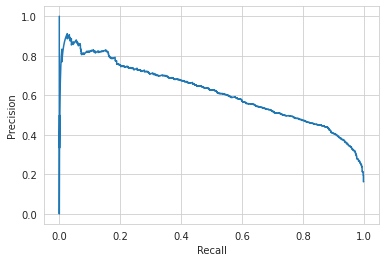

In [ ]:
print("Evaluation XGBoost - Test")
evaluate_results(y_test,y_pred,y_prob=y_prob)

 Interpretation

In [ ]:
#We use the shap library to interpret the model and find the most important features for the decision.

In [ ]:
pip install shap

     |████████████████████████████████| 358kB 7.6MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491629 sha256=a825396a18daae541cec3b6f77c10d5abd7b555555a8157527caf039a1b93a2f
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
import shap
explainer = shap.Explainer(model,feature_names=loans.drop('loan_status',axis=1).columns)
shap_values = explainer(X_train)

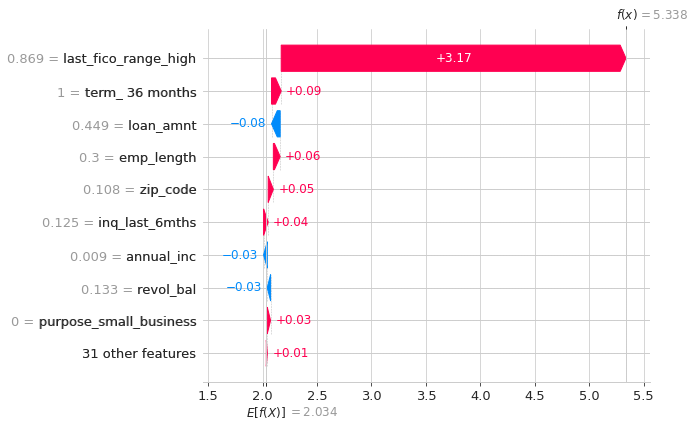

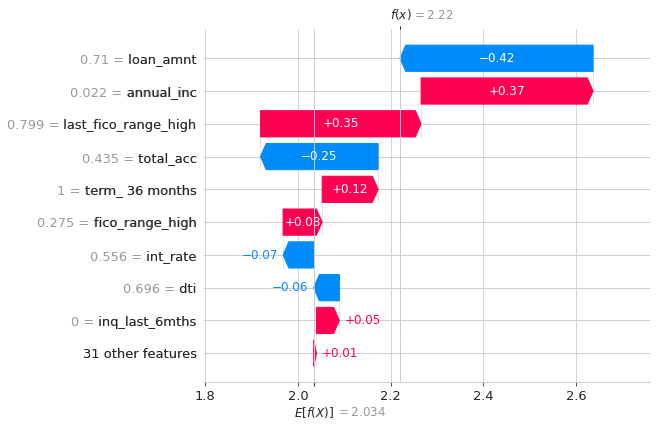

In [ ]:
#Below, the effect of the features for one charged off and one fully paid sample are visualized. 
#Features that contribute to a higher probability of fully paying the loan are red, 
#features that result in a lower probability are blue


shap.plots.waterfall(shap_values[0])
shap.plots.waterfall(shap_values[29])

In [ ]:
#The shawn values for all samples combined are visualized in the summary below. total_rec_prncp, 
#funded_amntand recoveries are clearly the most predictive indicators.

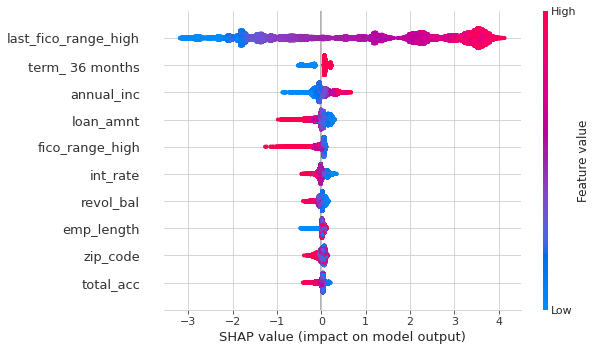

In [ ]:
shap.summary_plot(shap_values, X_train, max_display=10)